In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/hamel/github/jupytercon-2023/_quarto_demo':
  os.chdir(r'/Users/hamel/github/jupytercon-2023/_quarto_demo')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/hz/fg03h5c13x96l0g9420_qvlm0000gn/T/ipykernel_25966/3221594251.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/anaconda3/lib/python3.9/importlib/_bootstrap.py": 1648164974.0, "/opt/anaconda3/lib/python3.9/importlib/_bootstrap_external.py": 1648164974.0, "/opt/anaconda3/lib/python3.9/codecs.py": 1648164969.0, "/opt/anaconda3/lib/python3.9/encodings/aliases.py": 1648164975.0, "/opt/anaconda3/lib/python3.9/encodings/__init__.py": 1648164975.0, "/opt/anaconda3/lib/python3.9/encodings/utf_8.py": 1648164975.0, "/opt/anaconda3/lib/python3.9/encodings/latin_1.py": 1648164975.0, "/opt/anaconda3/lib/python3.9/abc.py": 1648164969.0, "/opt/anaconda3/lib/python3.9/io.py": 1648164969.0, "/opt/anaconda3/lib/python3.9/stat.py": 1648164969.0, "/opt/anaconda3/lib/python3.9/_collections_abc.py": 1648164969.0, "/opt/anaconda3/lib/python3.9/genericpath.py": 1648164969.0, "/opt/anaconda3/lib/python3.9/posixpath.py": 1648164969.0, "/opt/anaconda3/lib/python3.9/os.py": 1648164969.0, "/opt/anaconda3/lib/python3.9/_sitebuiltins.py": 1648164969.0, "/opt/anaconda3/lib/python3.9/_bootlocale.py": 1648164969.0, "/opt/

In [2]:
#| echo: fenced
import pandas as pd
df = pd.read_csv("palmer-penguins.csv") 
df = df[["species", "island", "year", "bill_length_mm", "bill_depth_mm"]]

import time
time.sleep(3)

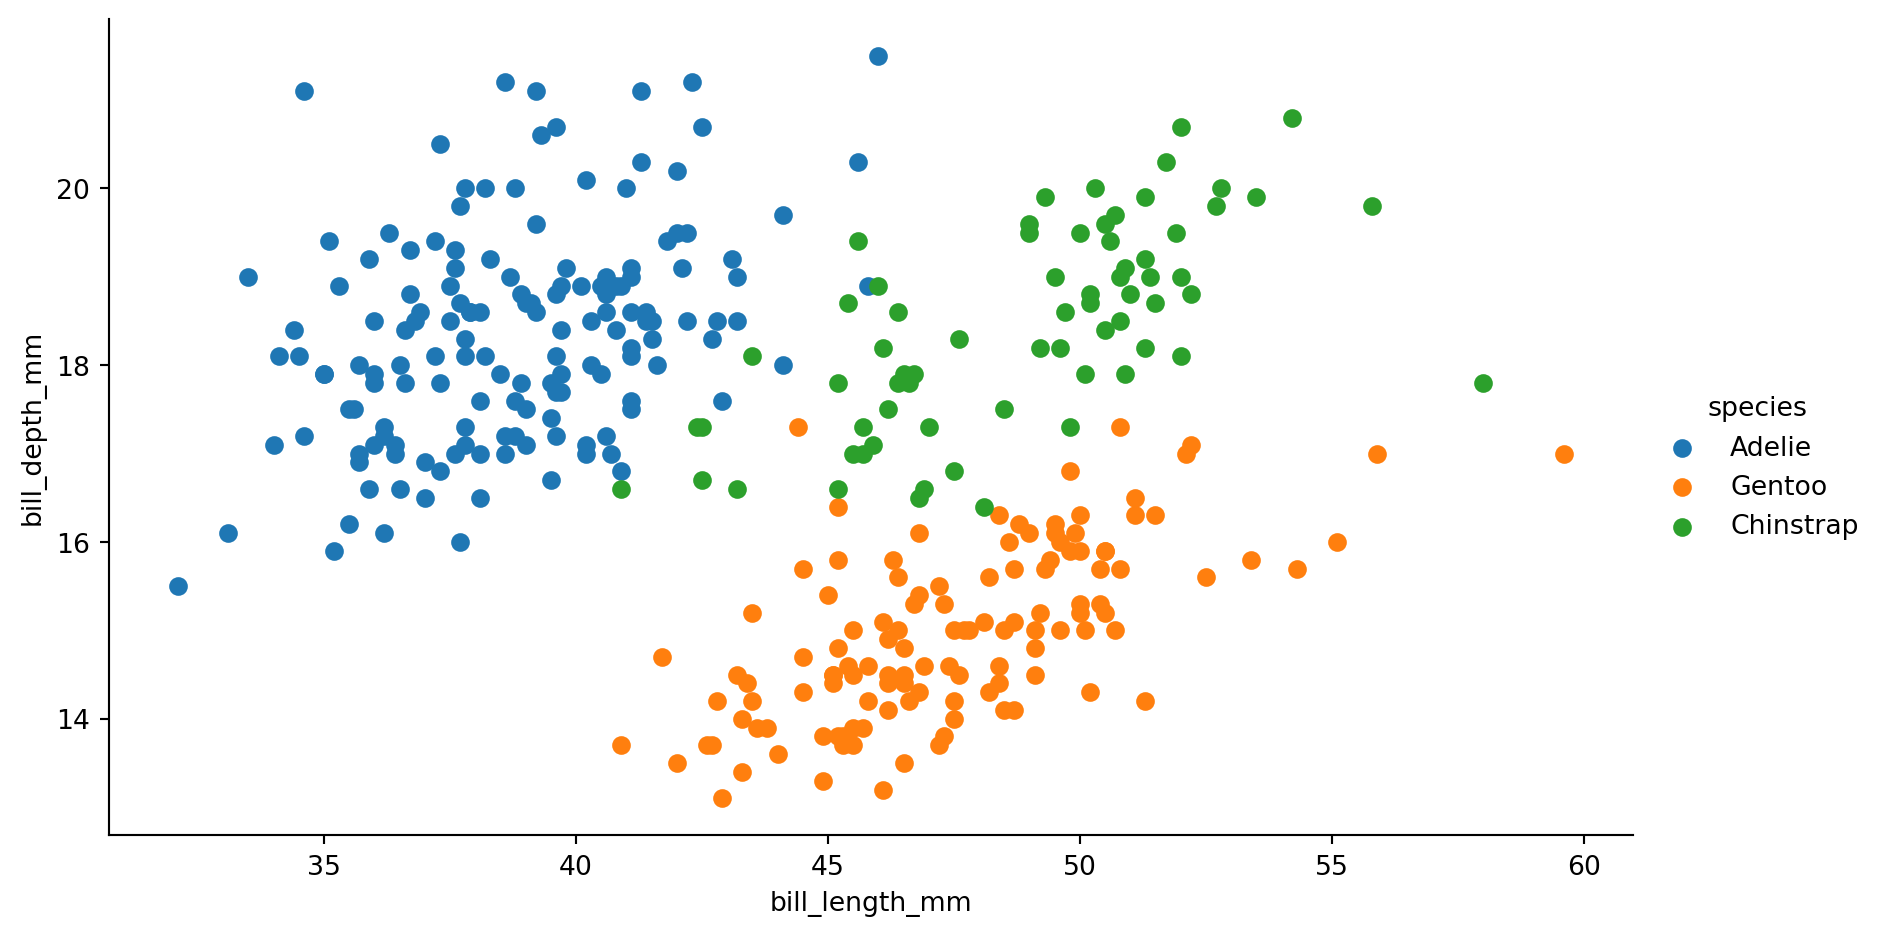

In [3]:
#| label: fig-bill-sizes
#| fig-cap: Bill Sizes by Species
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.FacetGrid(df, hue="species", height=5, aspect=3.5/2)
g.map(plt.scatter, "bill_length_mm", "bill_depth_mm").add_legend()